<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_03/blob/uploading-from-colab/TestCase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input the number of interpolations required here. e.g. input 5 for a spatial resolution of 0.2: 5
Input total time period here (in seconds) e.g. 300 : 300
Input temporal resolution here (in seconds) e.g. 20 : 20
Input river velocity (in m/s) e.g. 0.1 : 0.1


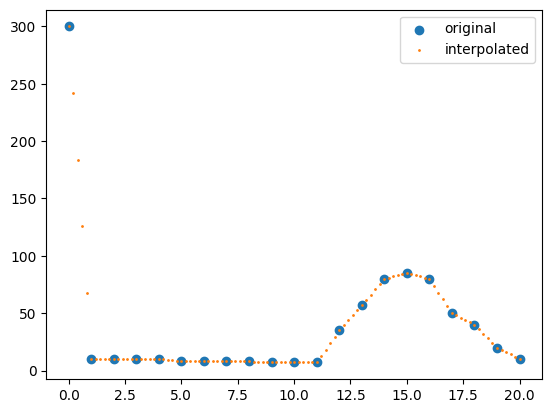

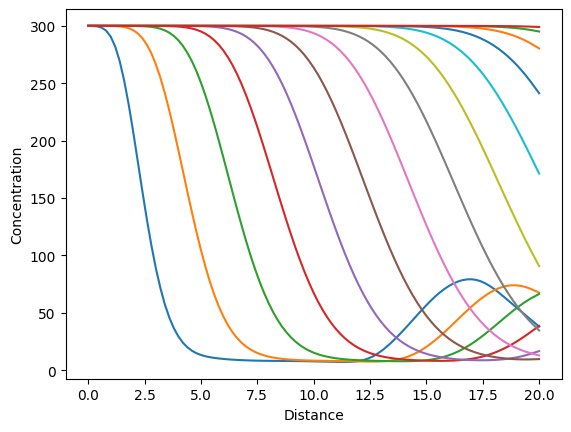

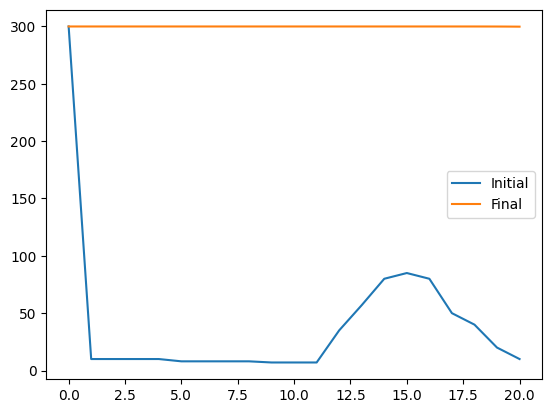

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# encoding latin1 to avoid error when reading mu
initial_conditions = pd.read_csv("initial_conditions.csv",encoding="latin1");

Distance=initial_conditions["Distance (m)"]
Concentration=initial_conditions["Concentration (µg/m_ )"]

# test that the file contents are read correctly
assert Distance[5] == 5
assert Concentration[5] == 8

# test that the columns in the file are equal length
assert len(Distance) == len(Concentration)

# variable for the what number row the last row is
lastRow = len(Distance)-1

# gets river length from file, adjusting for first row being Distance=0
riverLength = (Distance[lastRow]) # e.g. len=21, Distance[20]=20m

# assume that the initial resolution is the same for the whole file
# everything in metres
initialResolution = Distance[1] - Distance[0]

numberOfInterpolations = float(input("Input the number of interpolations required here. e.g. input 5 for a spatial resolution of 0.2: "))
spatialResolution = initialResolution/numberOfInterpolations

# e.g. inital length 21 becomes 101 when adding 4 interpolation points
interpLength = int((len(Concentration) - 1) * numberOfInterpolations + 1)

# interpolating first column
# again assuming evenly spaced
newD = np.linspace(Distance[0], Distance[lastRow], num=interpLength)

# interpolating second column using newD
newC = np.interp(newD, Distance, Concentration)
# print(newC)

# scatter plot to test if interpolation looks correct
plt.scatter(Distance, Concentration, label='original')

plt.scatter(newD, newC, label='interpolated', s=1)

plt.legend()



totalT=float(input("Input total time period here (in seconds) e.g. 300 : "))

temporalRes=float(input("Input temporal resolution here (in seconds) e.g. 20 : "))

u=float(input("Input river velocity (in m/s) e.g. 0.1 : "))

dx = spatialResolution

CFLmax = 1
dt = CFLmax * dx / u

c = u * dt / dx  # Courant number

# ensures Nt isn't 0
Nt = max(int(math.ceil(totalT / dt)), 1)

plotInterval = max(int(math.ceil(temporalRes / dt)), 1)

Nx = interpLength

x=newD

y = newC.copy()

plt.figure()

for j in range(1, Nt):
    yOld = y.copy()

    for i in range(1, Nx):
        y[i] = ((1.0 / dt) * yOld[i] + (u / dx) * y[i - 1] ) / ((1.0 / dt) + (u / dx))

    # boundary conditions
    y[0] = yOld[0]   # continuous inflow of pollutant
    y[-1] = yOld[-1] - c * (yOld[-1] - yOld[-2])   # downstream boundary: allows pollutant to exit the domain with the flow velocity

    if j % plotInterval == 0:
        plt.plot(x, y)


# graph of concentration against distance with different times plotted in different colours
plt.xlabel("Distance")
plt.ylabel("Concentration")
plt.show()

# graph of concentration against distance, only showing values for initial and final times
plt.plot(x, newC, label="Initial")
plt.plot(x, y, label="Final")
plt.legend()
plt.show()
